In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pickle


Importing libraries.

In [3]:
data = pd.read_csv("project_root/dataset/breast-cancer-wisconsin-data.csv")

Read the data saved in csv file using pandas.

In [4]:
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [5]:
data.head()  # returns top 5 rows of the dataset.

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
data.shape   #returns the shape of data

(569, 32)

In [7]:
data.duplicated().sum()  #returns number of duplicate values in the dataset

np.int64(0)

In [8]:
data.isna().sum()   #returns number of null values or nan values in the dataset

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.columns  #returns column names

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
data[data["diagnosis"] == "B"].shape  #retuns the shape of data where diagnosis = B

(357, 32)

In [11]:
data[data["diagnosis"] == "M"].shape   #returns the shape of data where diagnosis = M

(212, 32)

In [12]:
def train_test_split(training_data_frac, data):
    
    training_data_len = int(0.7 *data.shape[0])
    testing_data_len = int(0.3 *data.shape[0])
    
    pos_class_data = data[data["diagnosis"] == 1]
    neg_class_data = data[data["diagnosis"] == 0]
    
    pos_class_training_data = pos_class_data.iloc[0:int(training_data_len//2)]
    pos_class_testing_data = pos_class_data.iloc[int(training_data_len//2):]
    
    neg_class_training_data = neg_class_data.iloc[0:int((training_data_len//2))]
    neg_class_testing_data = neg_class_data.iloc[int(training_data_len//2):]
    
    training_data = pd.concat([pos_class_training_data,neg_class_training_data], axis = 0)

    testing_data = pd.concat([neg_class_testing_data, pos_class_testing_data], axis=0)
    
    return training_data, testing_data

Dividing the data into training data and testing data using train_test_split function. It returns training data and testing data at end.

In [13]:
data["diagnosis"].replace({'M': 1, 'B': 0}, inplace=True)  #Converting String values 'M' & 'B' to 1 & 0


/tmp/ipykernel_9077/2944081553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["diagnosis"].replace({'M': 1, 'B': 0}, inplace=True)  #Converting String values 'M' & 'B' to 1 & 0
/tmp/ipykernel_9077/2944081553.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnosis"].replace({'M'

<Axes: >

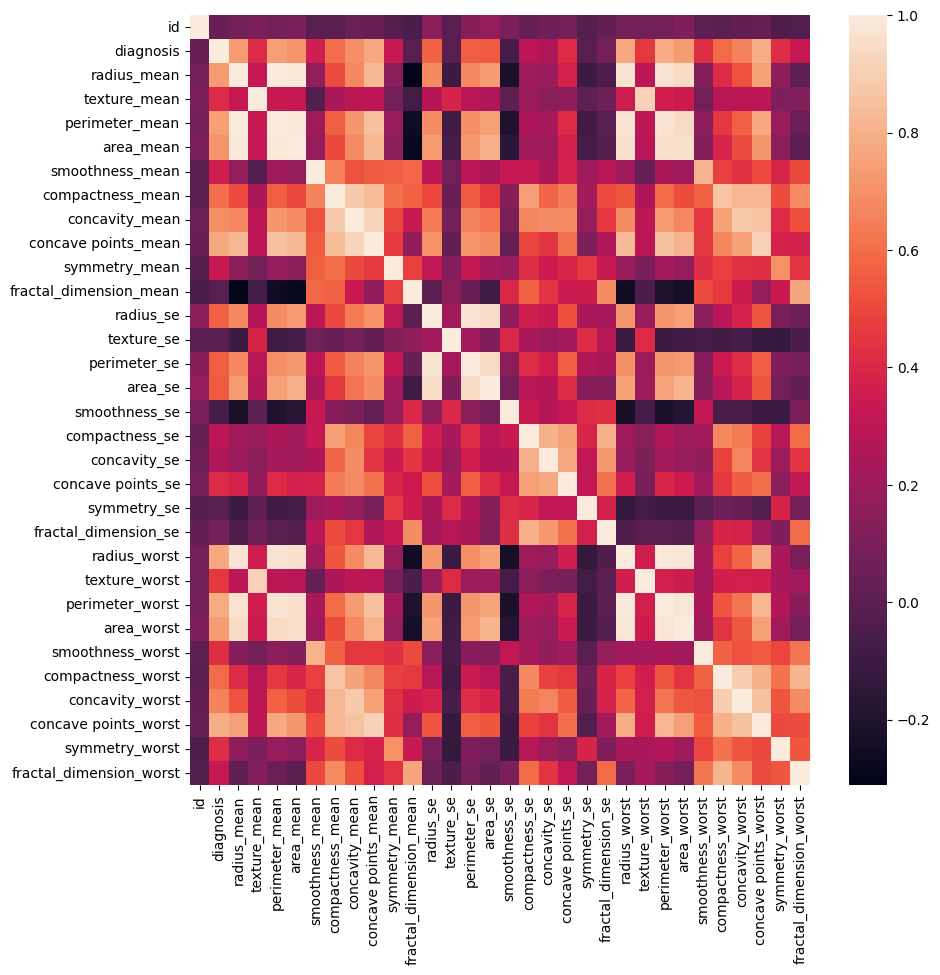

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr())
   

Using matplotlib library to plot a correlation matrix. 
The determinant of data.corr() (the correlation matrix of your dataset) helps determine if the matrix is singular (i.e., not invertible).

In [14]:
np.linalg.det(data.corr())

np.float64(4.2734625060434696e-32)

If np.linalg.det(data.corr()) returns 0 or a very small value, it means the dataset has multicollinearity, where some features are highly correlated and redundant. This can cause problems in regression models.

In [15]:
data_corr = data.corr()  #saved the corrlated data into data_corr variable

In [16]:
data_corr

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0.380676   
symmetry_se                   -0.081629  -0.072497         0.200

In [17]:
selected_features = list(data_corr[(data_corr[data.columns[1]] > 0.5)| (data_corr[data.columns[1]] < -0.5) ].index)

Selecting features that have a correlation greater than 0.5 or less than -0.5 with the second column (data.columns[1]).

In [18]:
selected_features   

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [19]:
refined_data = data[selected_features]  #make a dataset named refined data

In [20]:
refined_data

diagnosis  radius_mean  perimeter_mean  area_mean  compactness_mean  \
0            1        17.99          122.80     1001.0           0.27760   
1            1        20.57          132.90     1326.0           0.07864   
2            1        19.69          130.00     1203.0           0.15990   
3            1        11.42           77.58      386.1           0.28390   
4            1        20.29          135.10     1297.0           0.13280   
..         ...          ...             ...        ...               ...   
564          1        21.56          142.00     1479.0           0.11590   
565          1        20.13          131.20     1261.0           0.10340   
566          1        16.60          108.30      858.1           0.10230   
567          1        20.60          140.10     1265.0           0.27700   
568          0         7.76           47.92      181.0           0.04362   

     concavity_mean  concave points_mean  radius_se  perimeter_se  area_se  \
0           0.30010              0.14710     1.0950         8.589   153.40   
1           0.08690              0.07017     0.5435         3.398    74.08   
2           0.19740              0.12790     0.7456         4.585    94.03   
3           0.24140              0.10520     0.4956         3.445    27.23   
4           0.19800              0.10430     0.7572         5.438    94.44   
..              ...                  ...        ...           ...      ...   
564         0.24390              0.13890     1.1760         7.673   158.70   
565         0.14400              0.09791     0.7655         5.203    99.04   
566         0.09251              0.05302     0.4564         3.425    48.55   
567         0.35140              0.15200     0.7260         5.772    86.22   
568         0.00000              0.00000     0.3857         2.548    19.15   

     radius_worst  perimeter_worst  area_worst  compactness_worst  \
0          25.380           184.60      2019.0            0.66560   
1          24.990           158.80      1956.0            0.18660   
2          23.570           152.50      1709.0            0.42450   
3          14.910            98.87       567.7            0.86630   
4          22.540           152.20      1575.0            0.20500   
..            ...              ...         ...                ...   
564        25.450           166.10      2027.0            0.21130   
565        23.690           155.00      1731.0            0.19220   
566        18.980           126.70      1124.0            0.30940   
567        25.740           184.60      1821.0            0.86810   
568         9.456            59.16       268.6            0.06444   

     concavity_worst  concave points_worst  
0             0.7119                0.2654  
1             0.2416                0.1860  
2             0.4504                0.2430  
3             0.6869                0.2575  
4             0.4000                0.1625  
..               ...                   ...  
564           0.4107                0.2216  
565           0.3215                0.1628  
566           0.3403                0.1418  
567           0.9387                0.2650  
568           0.0000                0.0000  

[569 rows x 16 columns]

In [21]:
refined_data.shape #returns shape

(569, 16)

In [22]:
refined_training_data,refined_testing_data = train_test_split(0.7, refined_data)   #using tain_test_split function to split the refined testing and training data

In [23]:
refined_training_data.shape

(398, 16)

In [24]:

refined_training_data.head()

diagnosis  radius_mean  perimeter_mean  area_mean  compactness_mean  \
0          1        17.99          122.80     1001.0           0.27760   
1          1        20.57          132.90     1326.0           0.07864   
2          1        19.69          130.00     1203.0           0.15990   
3          1        11.42           77.58      386.1           0.28390   
4          1        20.29          135.10     1297.0           0.13280   

   concavity_mean  concave points_mean  radius_se  perimeter_se  area_se  \
0          0.3001              0.14710     1.0950         8.589   153.40   
1          0.0869              0.07017     0.5435         3.398    74.08   
2          0.1974              0.12790     0.7456         4.585    94.03   
3          0.2414              0.10520     0.4956         3.445    27.23   
4          0.1980              0.10430     0.7572         5.438    94.44   

   radius_worst  perimeter_worst  area_worst  compactness_worst  \
0         25.38           184.60      2019.0             0.6656   
1         24.99           158.80      1956.0             0.1866   
2         23.57           152.50      1709.0             0.4245   
3         14.91            98.87       567.7             0.8663   
4         22.54           152.20      1575.0             0.2050   

   concavity_worst  concave points_worst  
0           0.7119                0.2654  
1           0.2416                0.1860  
2           0.4504                0.2430  
3           0.6869                0.2575  
4           0.4000                0.1625

In [25]:
refined_training_data.reset_index(drop=True, inplace=True)   #to reset index

In [26]:
refined_testing_data.reset_index(drop=True, inplace=True)

In [27]:
X_train = np.array(refined_training_data.iloc[:,1:])
y_train = np.array(refined_training_data.iloc[:,0])
y_train = y_train.reshape(y_train.shape[0],1)

zero_mean_one_std_transformer = StandardScaler()
zero_mean_one_std_transformer.fit(X_train)

X_train = zero_mean_one_std_transformer.transform(X_train)

X_test = np.array(refined_testing_data.iloc[:,1:])
y_test = np.array(refined_testing_data.iloc[:,0])
y_test = y_test.reshape(y_test.shape[0],1)

X_test = zero_mean_one_std_transformer.transform(X_test)

In [28]:
X_train

array([[ 0.89515795,  1.0562944 ,  0.77634029, ...,  2.31891685,
         1.86622786,  2.01129904],
       [ 1.59087436,  1.45120846,  1.63932906, ..., -0.51065033,
        -0.27545175,  0.8632344 ],
       [ 1.35357574,  1.33781729,  1.31272101, ...,  0.89468168,
         0.67539388,  1.68741179],
       ...,
       [-0.21583103, -0.28406736, -0.30518379, ..., -1.01749138,
        -1.13499252, -1.02283047],
       [-1.56196138, -1.52667813, -1.24172575, ..., -0.87571766,
        -0.94573417, -1.13763694],
       [-1.41149248, -1.40624889, -1.14188459, ..., -0.99327171,
        -0.85470254, -1.0957051 ]], shape=(398, 15))

In [29]:
def sigmoid(theta0,theta,X):
    
    return 1/(1 + np.exp(-(theta0 + np.matmul(X,theta))))

In [30]:
def nll(theta0,theta,X,y):

    p_class_eq_pos_on_X = sigmoid(theta0,theta,X)
    p_class_eq_neg_on_X = (1 - p_class_eq_pos_on_X)

    
    log_p_class_eq_pos_on_X = np.log(p_class_eq_pos_on_X)
    log_p_class_eq_neg_on_X = np.log(p_class_eq_neg_on_X)

    one_minus_y = (1 - y)

    first_term = np.matmul(y.T,log_p_class_eq_pos_on_X)
    second_term = np.matmul(one_minus_y.T,log_p_class_eq_neg_on_X)

    return -1/(y.shape[0])*(first_term + second_term)


In [31]:
theta0_initial = 0
theta_initial = np.random.uniform(low=0,high=1,size=X_train.shape[1])
print("The initial value of NLL is {}".format(nll(theta0_initial,theta_initial,X_train,y_train)[0]))

The initial value of NLL is 0.18609268368671025


In [32]:
y_train.shape

(398, 1)

In [33]:
def del_by_del_theta(theta0, theta, X, y ):
    
    p_class_eq_pos_on_X = sigmoid(theta0, theta, X)
    del_by_del_theta0 = -np.mean(y - p_class_eq_pos_on_X)
    del_by_del_theta = (-1/y.shape[0])*(np.matmul((y-p_class_eq_pos_on_X).T,X)).T
    
    return [del_by_del_theta0, del_by_del_theta]

In [34]:
epoch_counter = 0
theta0_initial = 0
theta_initial = np.zeros((X_train.shape[1],1))
epsilon = 10**(-3)
tol = 10**(-7)

while True:
    
    del_by_del_theta_initial = del_by_del_theta(theta0_initial, theta_initial, X_train, y_train)
    
    theta0_final = theta0_initial- (epsilon*del_by_del_theta_initial[0])
    theta_final = theta_initial - (epsilon*del_by_del_theta_initial[1])
    
    nll_initial = nll(theta0_initial, theta_initial, X_train, y_train)[0]
    nll_final = nll(theta0_final, theta_final,  X_train, y_train)[0]
    
    if abs(nll_initial - nll_final) < tol:
        break
    
    theta0_initial = theta0_final
    theta_initial = theta_final
    
    print("Epoch #{}, Binary Cross entropy loss = {}".format(epoch_counter,nll_initial))
    
    epoch_counter +=1
    

Epoch #0, Binary Cross entropy loss = [0.69314718]
Epoch #1, Binary Cross entropy loss = [0.69144639]
Epoch #2, Binary Cross entropy loss = [0.68975488]
Epoch #3, Binary Cross entropy loss = [0.68807261]
Epoch #4, Binary Cross entropy loss = [0.68639952]
Epoch #5, Binary Cross entropy loss = [0.68473556]
Epoch #6, Binary Cross entropy loss = [0.68308068]
Epoch #7, Binary Cross entropy loss = [0.68143482]
Epoch #8, Binary Cross entropy loss = [0.67979794]
Epoch #9, Binary Cross entropy loss = [0.67816999]
Epoch #10, Binary Cross entropy loss = [0.67655091]
Epoch #11, Binary Cross entropy loss = [0.67494064]
Epoch #12, Binary Cross entropy loss = [0.67333915]
Epoch #13, Binary Cross entropy loss = [0.67174638]
Epoch #14, Binary Cross entropy loss = [0.67016227]
Epoch #15, Binary Cross entropy loss = [0.66858677]
Epoch #16, Binary Cross entropy loss = [0.66701984]
Epoch #17, Binary Cross entropy loss = [0.66546143]
Epoch #18, Binary Cross entropy loss = [0.66391147]
Epoch #19, Binary Cros

In [35]:
with open("trained_model.pkl", "wb") as file_handle:
    pickle.dump([theta0_final, theta_final], file_handle)

In [36]:
y_pred = np.uint(sigmoid(theta0_final, theta_final, X_train) > 0.5)

In [37]:
print(classification_report(y_true=y_train, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       199
           1       0.93      0.96      0.95       199

    accuracy                           0.94       398
   macro avg       0.95      0.94      0.94       398
weighted avg       0.95      0.94      0.94       398



In [38]:
y_pred = np.uint(sigmoid(theta0_final, theta_final, X_test) > 0.5)

In [39]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       158
           1       0.52      0.92      0.67        13

    accuracy                           0.93       171
   macro avg       0.76      0.93      0.81       171
weighted avg       0.96      0.93      0.94       171

